In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/bad_restart/01jan18/SalishSea_1h_20180101_20180105_chem_T.nc')
combined_data_dissolved_inorganic_carbon = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['dissolved_inorganic_carbon'])
combined_data_total_alkalinity = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['total_alkalinity'])
combined_data_total_dissolved_oxygen = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['dissolved_oxygen'])
data5


<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 120)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2018-01-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180101_20180105_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-02 22:08:02 GMT
    uuid:         e88d864b-cbef-4387-b006-edd43c24477a

In [7]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = '*', color = 'red')
    axs[0].scatter(304 - 280, 447 - 430, marker = '*', color = 'red')
    axs[0].scatter(305 - 280, 446 - 430, marker = '*', color = 'red')
    axs[0].scatter(305 - 280, 447 - 430, marker = '*', color = 'red')

    axs[1].scatter(304 - 280, 446 - 430, marker = '*', color = 'red')
    axs[1].scatter(304 - 280, 447 - 430, marker = '*', color = 'red')
    axs[1].scatter(305 - 280, 446 - 430, marker = '*', color = 'red')
    axs[1].scatter(305 - 280, 447 - 430, marker = '*', color = 'red')

    axs[2].scatter(304 - 280, 446 - 430, marker = '*', color = 'red')
    axs[2].scatter(304 - 280, 447 - 430, marker = '*', color = 'red')
    axs[2].scatter(305 - 280, 446 - 430, marker = '*', color = 'red')
    axs[2].scatter(305 - 280, 447 - 430, marker = '*', color = 'red')

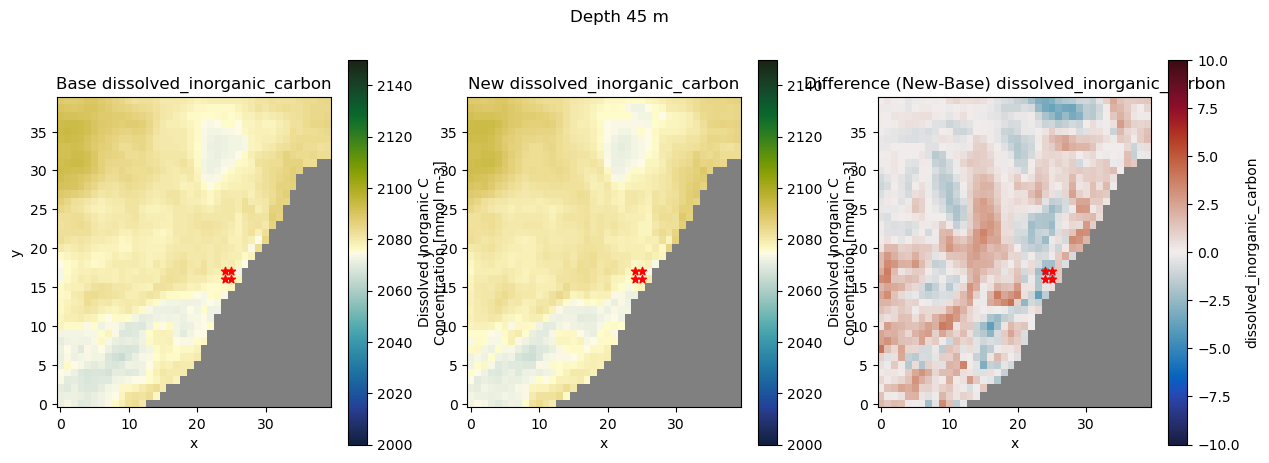

In [8]:
planview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 23, cm_delta, 2150, 2000, 10)

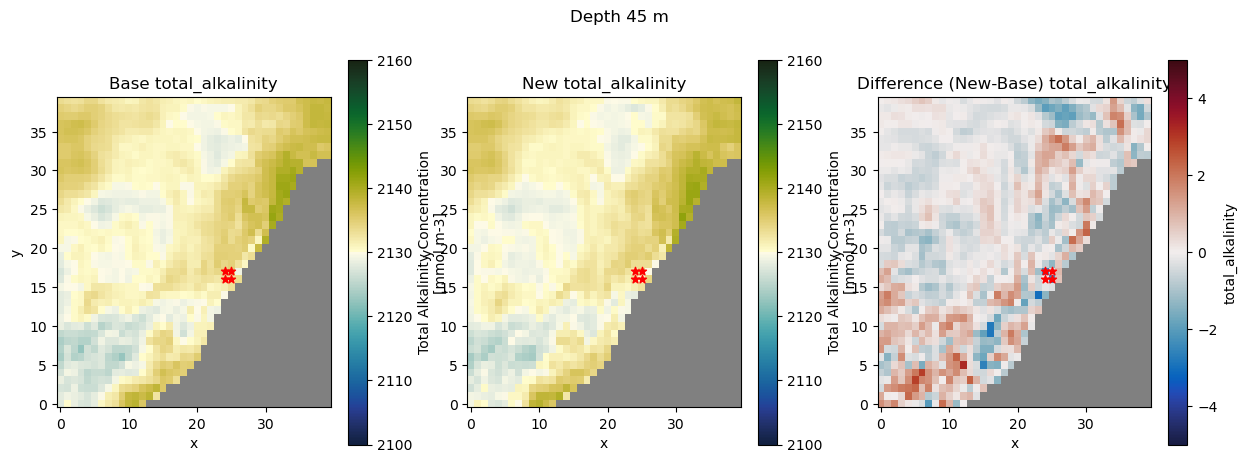

In [9]:
planview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 23, cm_delta, 2160, 2100, 5)

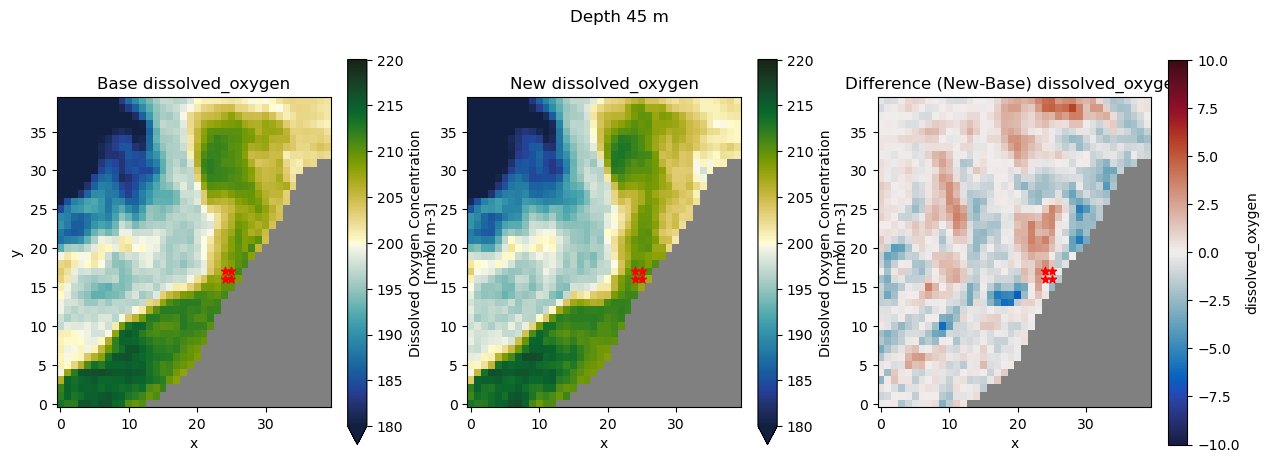

In [10]:
planview(combined_data_total_dissolved_oxygen, data5, 'dissolved_oxygen', 119, 23, cm_delta, 220, 180, 10)

In [11]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

    axs[0].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[0].scatter(305 - 280, 76, marker = '*', color = 'm')

    axs[1].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[1].scatter(305 - 280, 76, marker = '*', color = 'm')

    axs[2].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[2].scatter(305 - 280, 76, marker = '*', color = 'm')

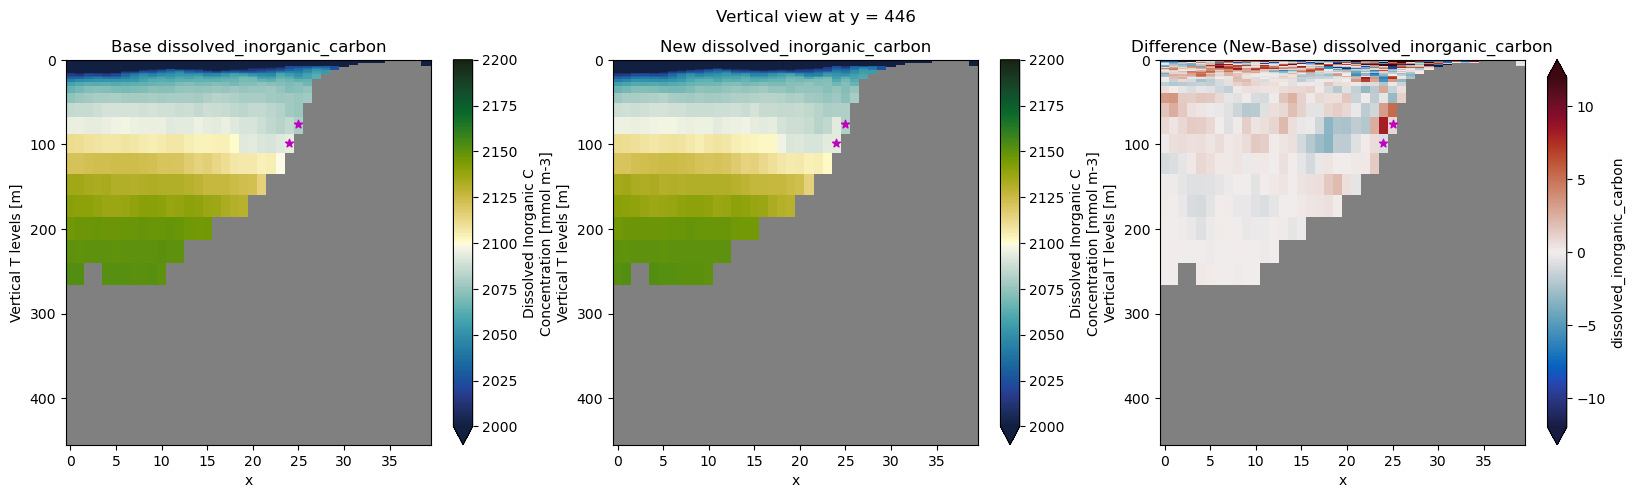

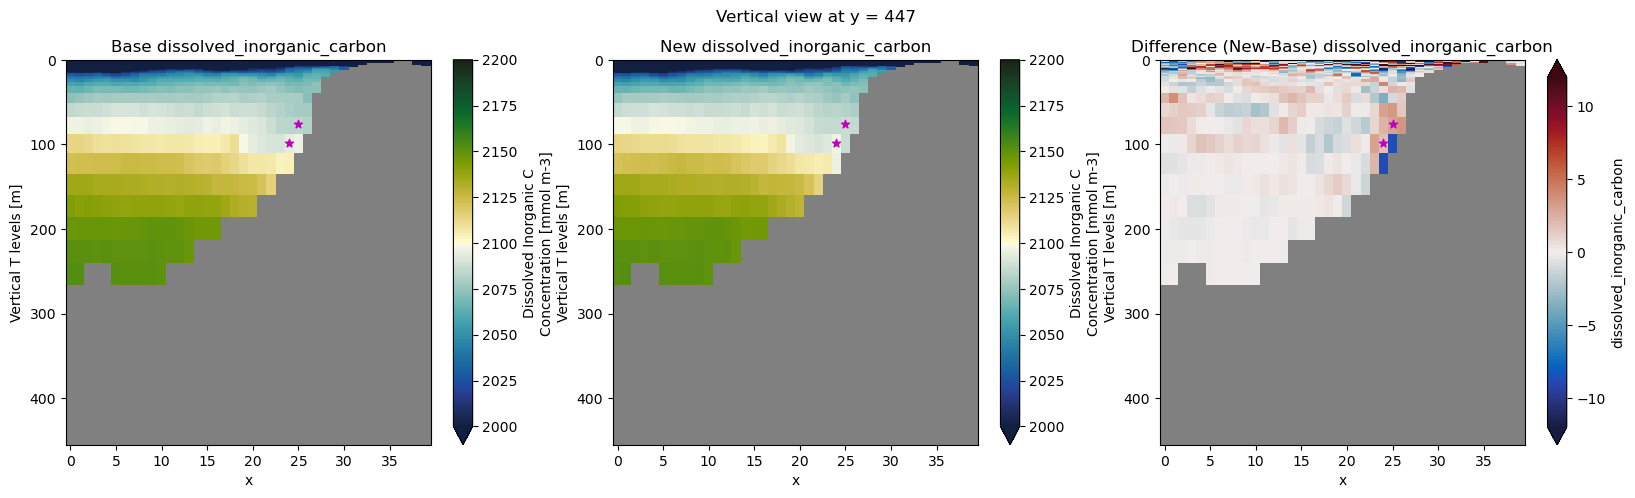

In [12]:
verticalview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 446, cm_delta, 2200, 2000, 12)
verticalview(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 447, cm_delta, 2200, 2000, 12)

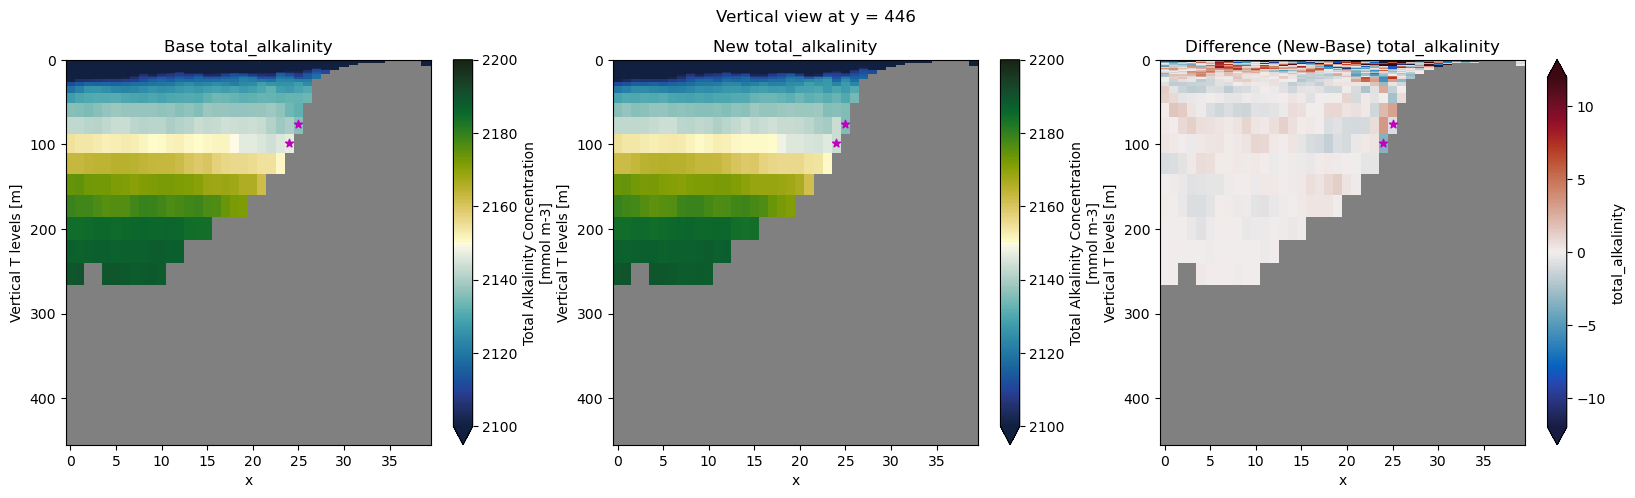

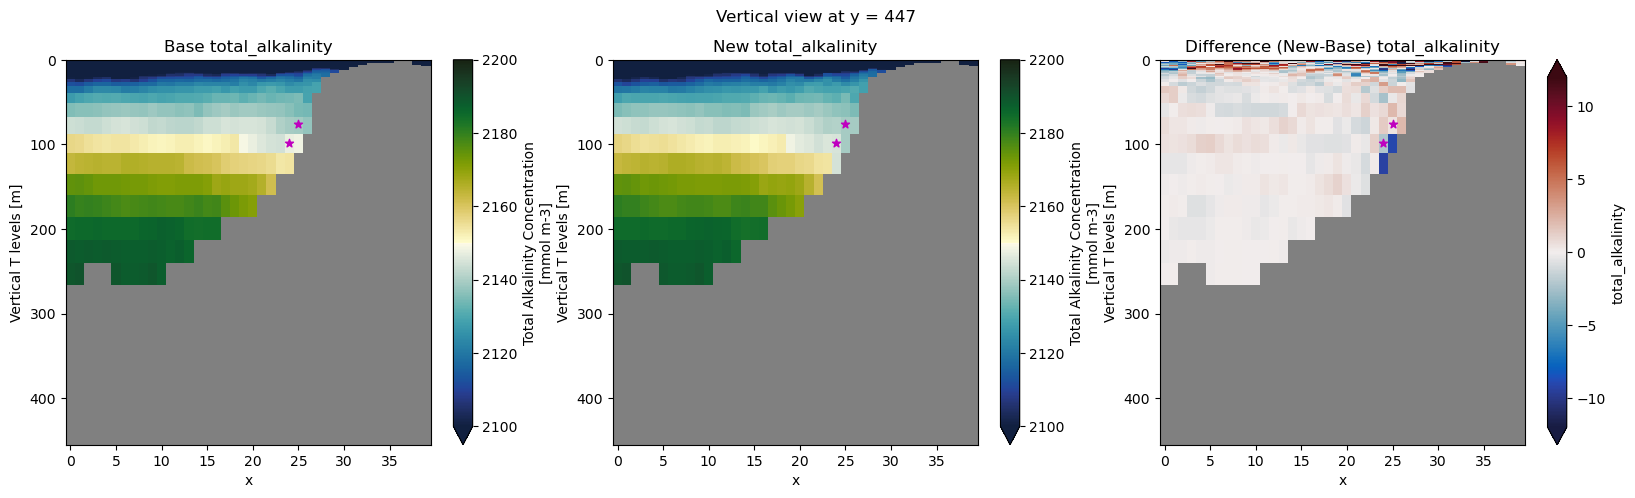

In [13]:
verticalview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 446, cm_delta, 2200, 2100, 12)
verticalview(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 447, cm_delta, 2200, 2100, 12)

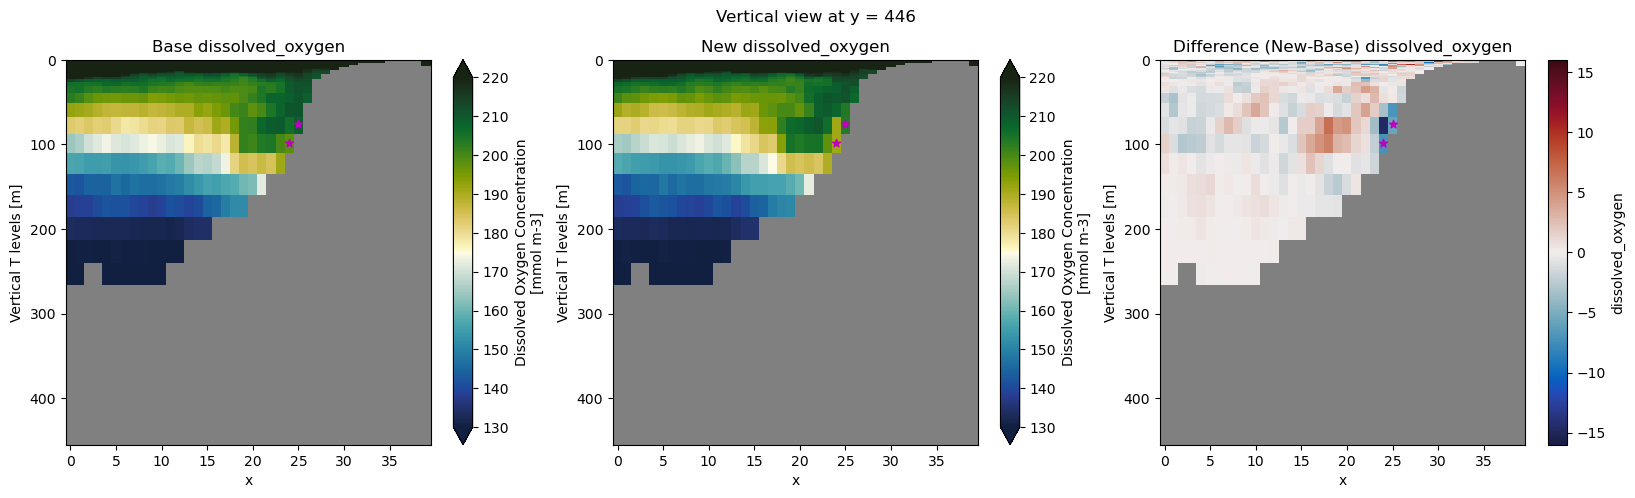

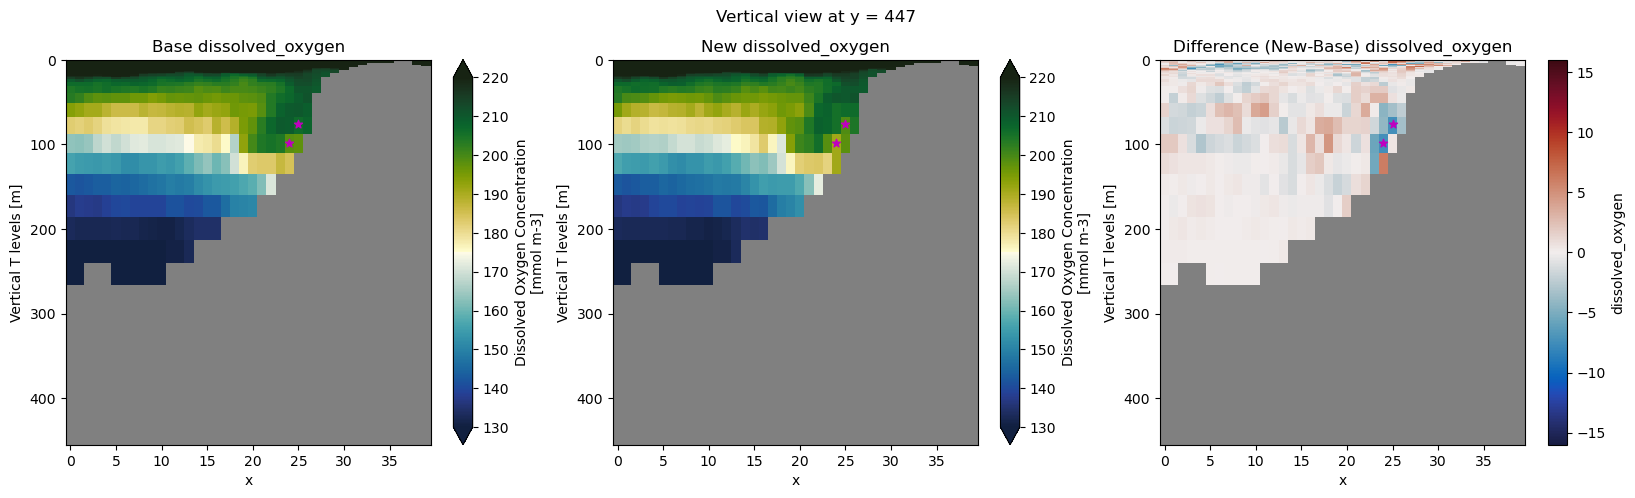

In [14]:
verticalview(combined_data_total_dissolved_oxygen, data5, 'dissolved_oxygen', 119, 446, cm_delta, 220, 130, 16)
verticalview(combined_data_total_dissolved_oxygen, data5, 'dissolved_oxygen', 119, 447, cm_delta, 220, 130, 16)

In [15]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    axs[0].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[0].scatter(446 - 430, 76, marker = '*', color = 'm')

    axs[1].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[1].scatter(446 - 430, 76, marker = '*', color = 'm')

    axs[2].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[2].scatter(446 - 430, 76, marker = '*', color = 'm')

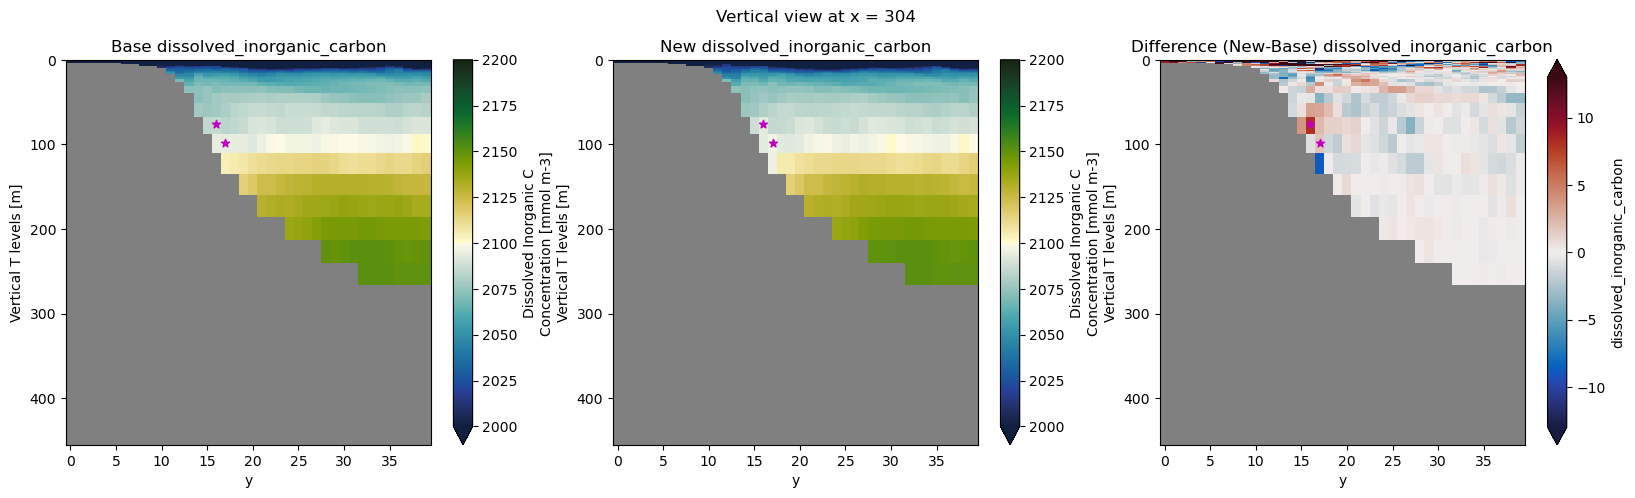

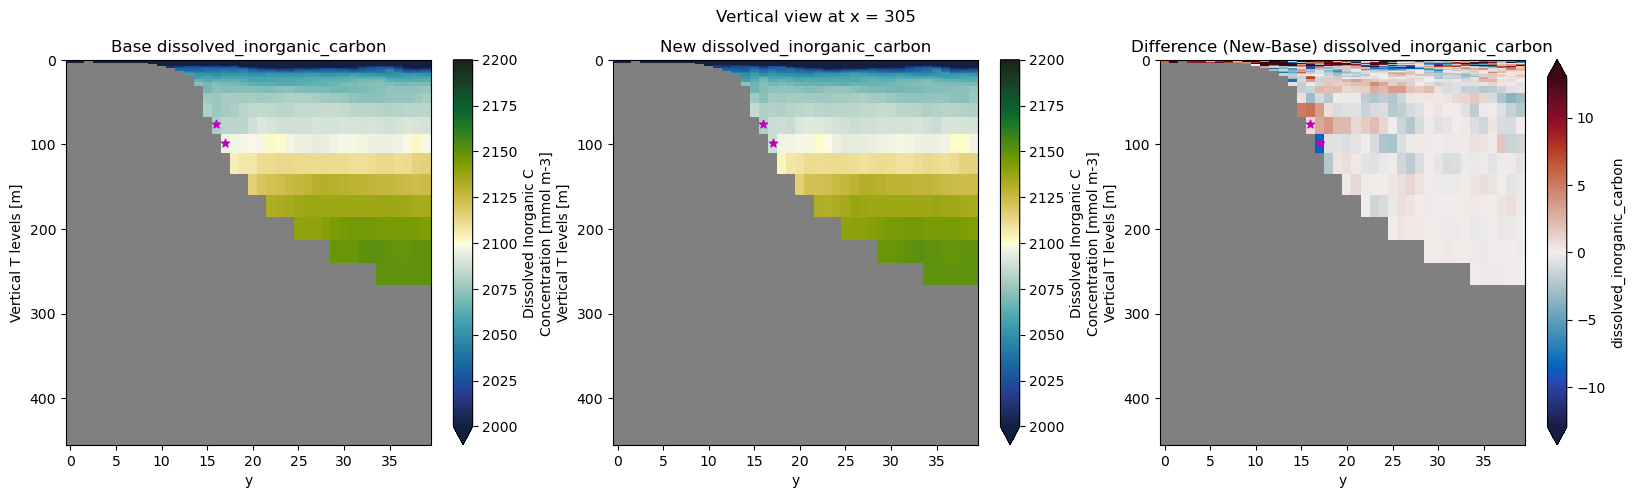

In [16]:
vertical_view_x(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 304, cm_delta, 2200, 2000, 13)
vertical_view_x(combined_data_dissolved_inorganic_carbon, data5, 'dissolved_inorganic_carbon', 119, 305, cm_delta, 2200, 2000, 13)

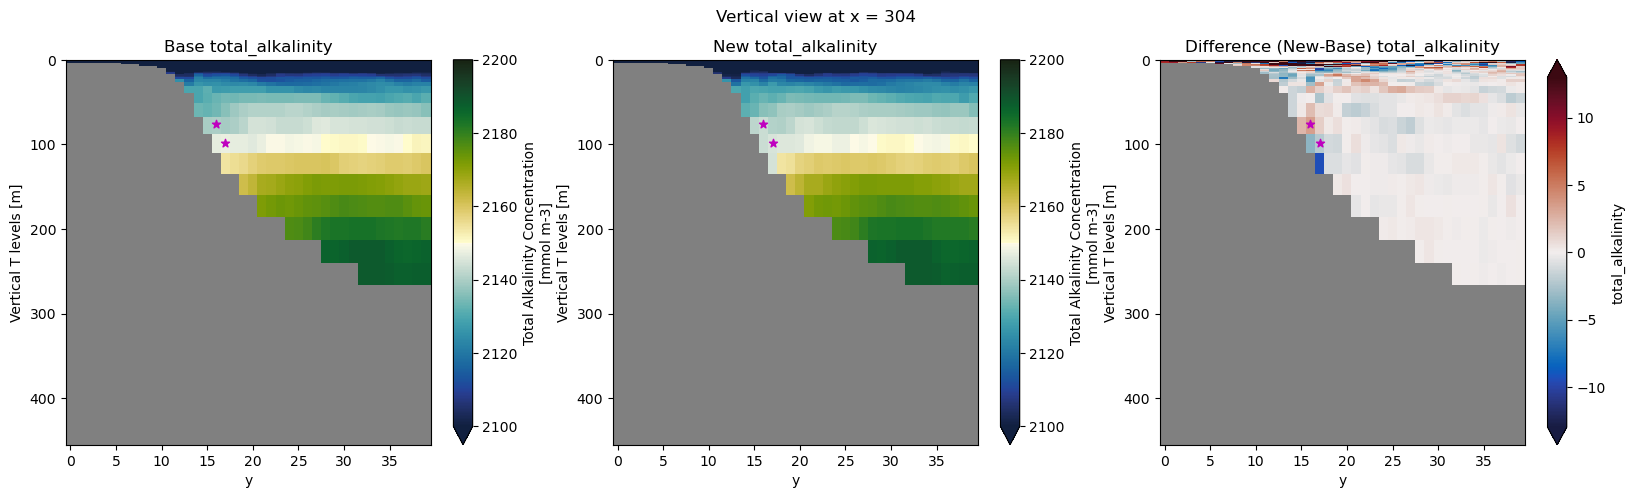

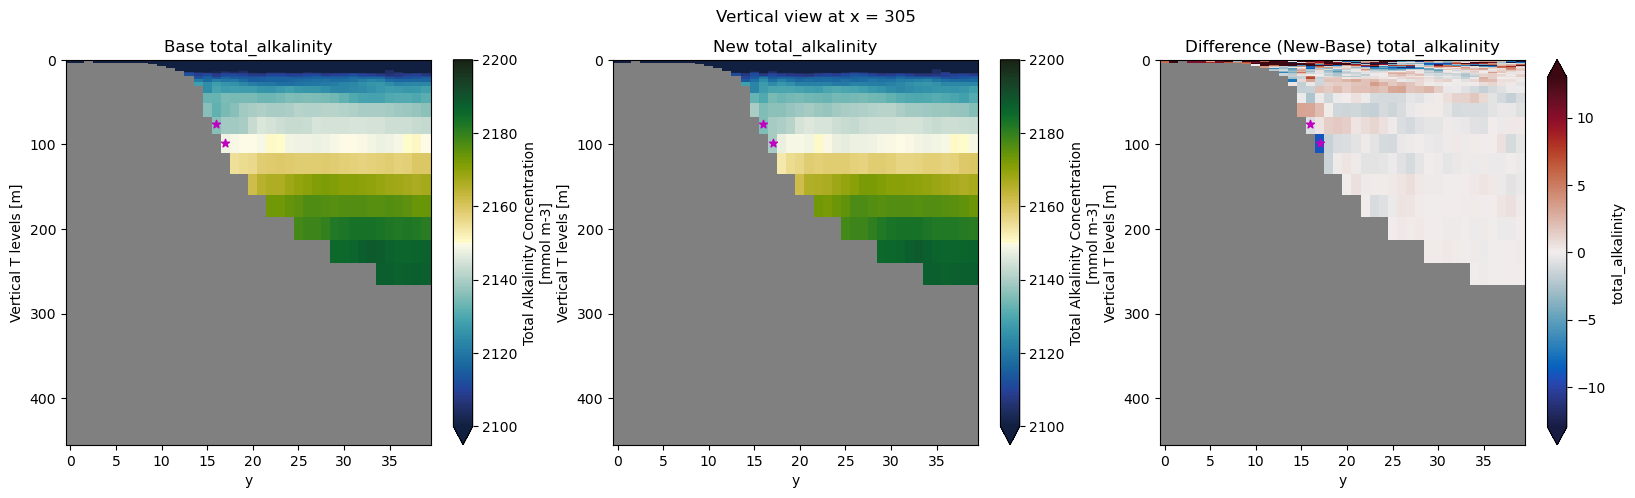

In [17]:
vertical_view_x(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 304, cm_delta, 2200, 2100, 13)
vertical_view_x(combined_data_total_alkalinity, data5, 'total_alkalinity', 119, 305, cm_delta, 2200, 2100, 13)

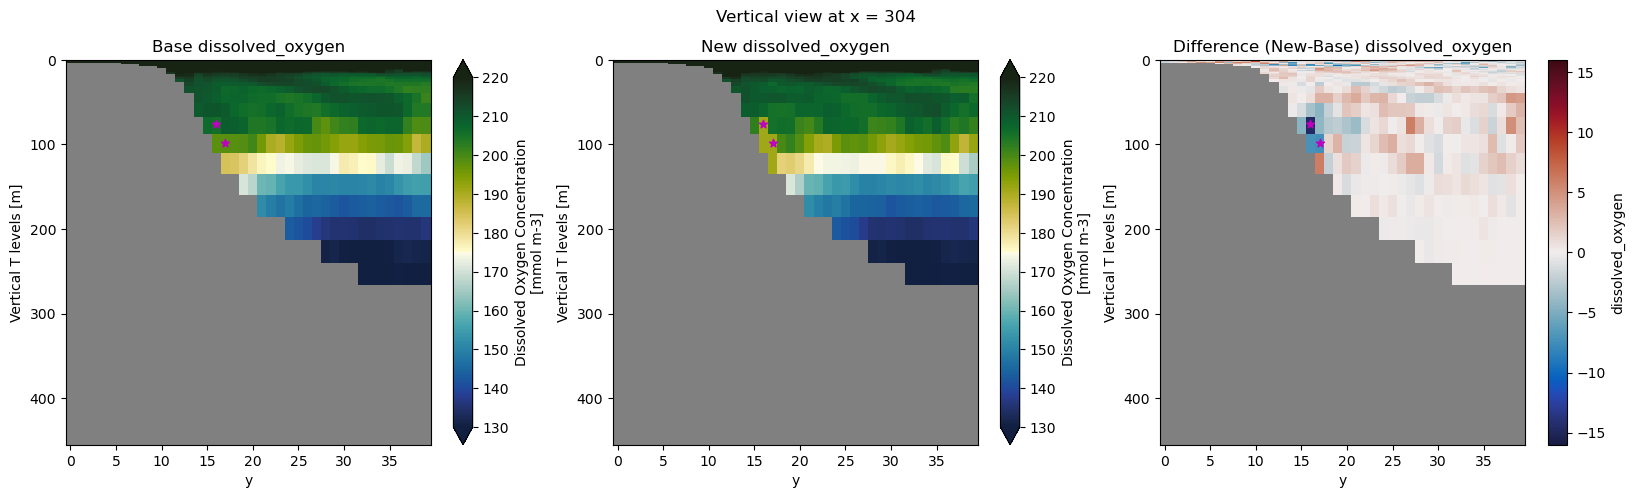

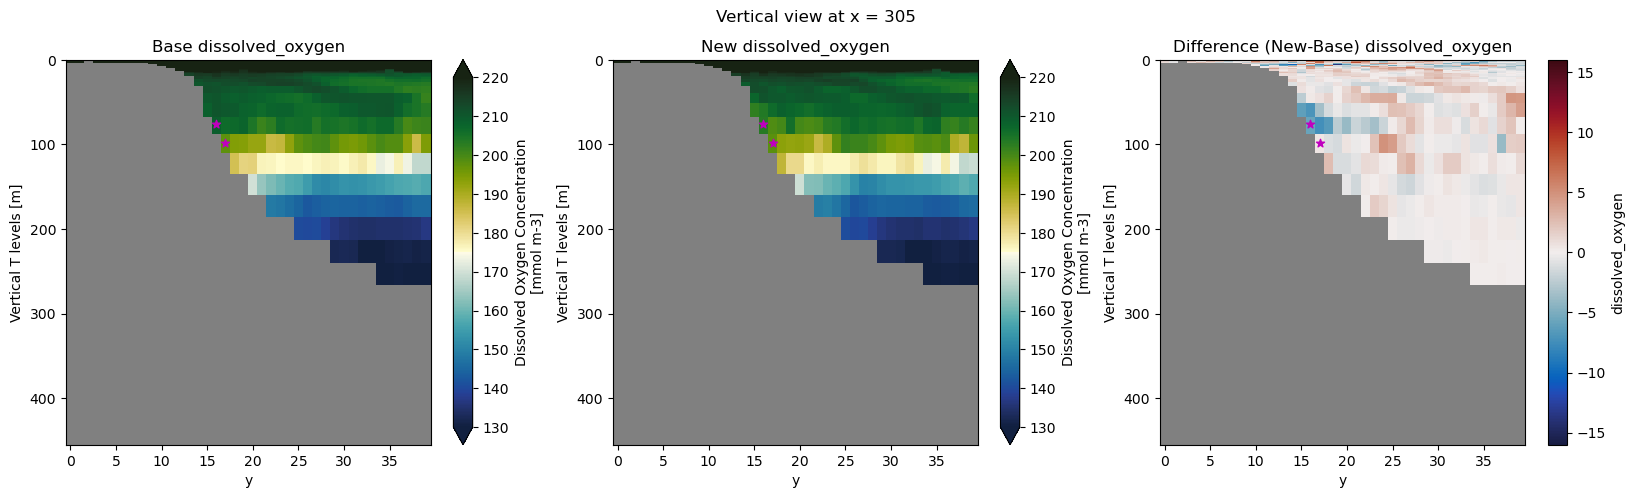

In [18]:
vertical_view_x(combined_data_total_dissolved_oxygen, data5, 'dissolved_oxygen', 119, 304, cm_delta, 220, 130, 16)
vertical_view_x(combined_data_total_dissolved_oxygen, data5, 'dissolved_oxygen', 119, 305, cm_delta, 220, 130, 16)

In [40]:
def plotSumDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')

In [5]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
depth = slice(0,26)

data5_slice = data5.isel(y = y_slice, x = x_slice)
combined_data_dissolved_inorganic_carbon_slice = combined_data_dissolved_inorganic_carbon.isel(y = y_slice, x = x_slice)
combined_data_total_alkalinity_slice = combined_data_total_alkalinity.isel(y = y_slice, x = x_slice)
combined_data_total_dissolved_oxygen_slice = combined_data_total_dissolved_oxygen.isel(y = y_slice, x = x_slice)

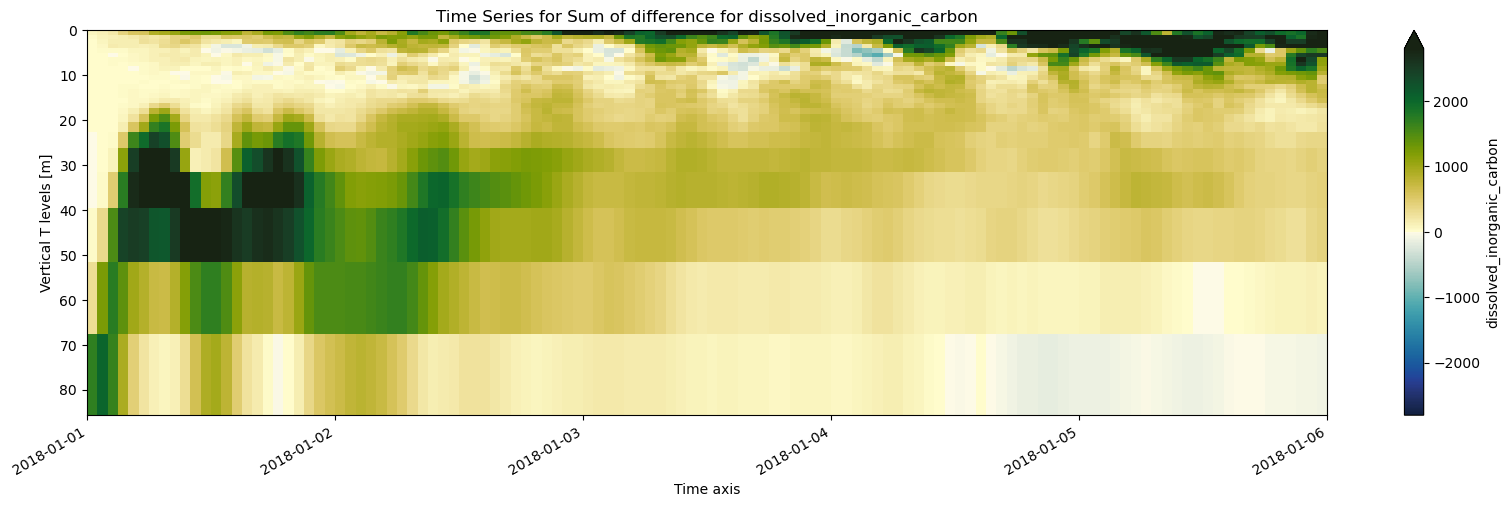

In [27]:
plotSumDiffTime(combined_data_dissolved_inorganic_carbon_slice, data5_slice, 'dissolved_inorganic_carbon', -2800, 2800, cm_delta)

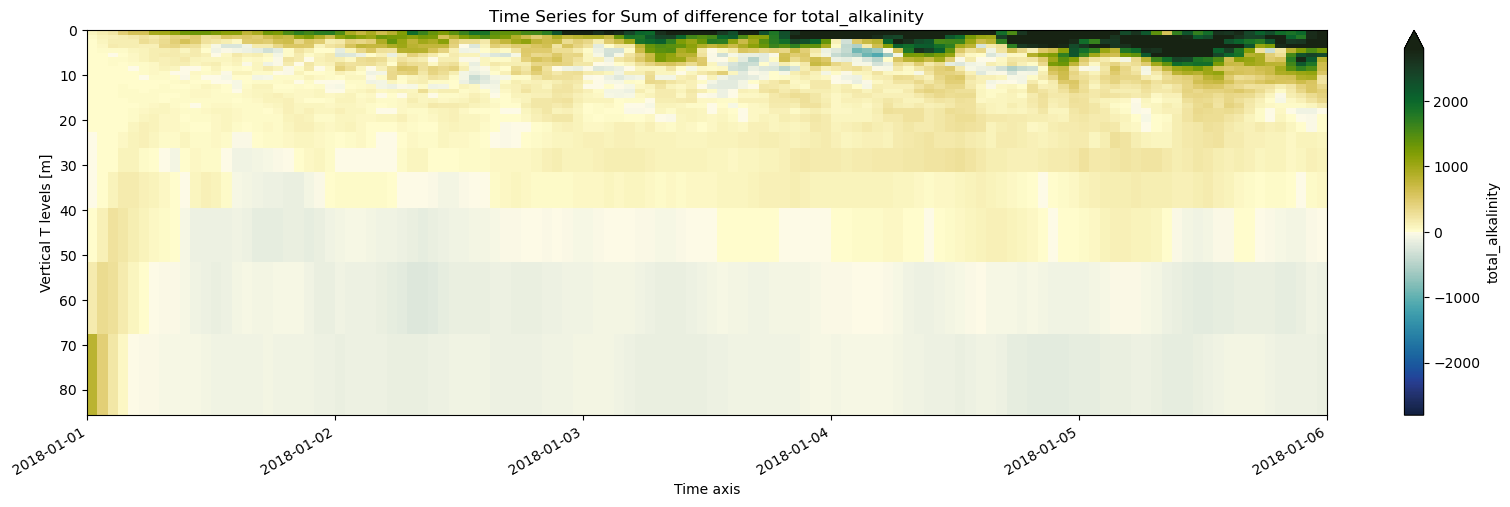

In [28]:
plotSumDiffTime(combined_data_total_alkalinity_slice, data5_slice, 'total_alkalinity', -2800, 2800, cm_delta)

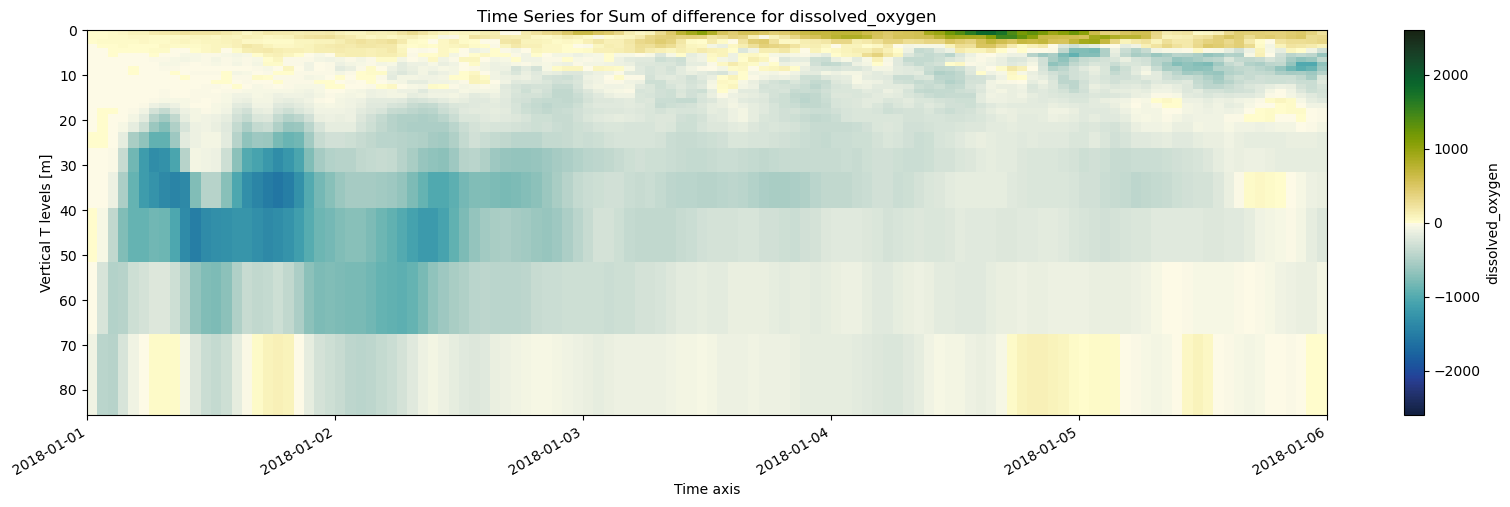

In [43]:
plotSumDiffTime(combined_data_total_dissolved_oxygen_slice, data5_slice, 'dissolved_oxygen', -2600, 2600, cm_delta)

In [10]:
def plotAvgDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    diff_avg = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    diff_avg.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for average difference in {field}')

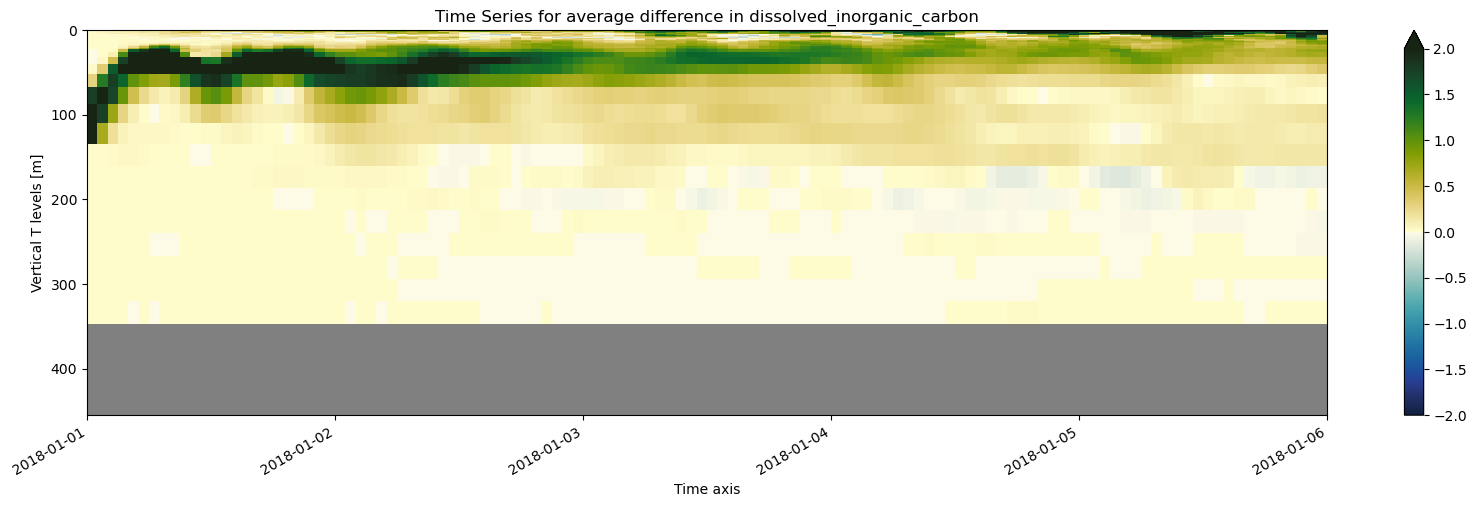

In [11]:
plotAvgDiffTime(combined_data_dissolved_inorganic_carbon_slice, data5_slice, 'dissolved_inorganic_carbon', -2, 2, cm_delta)

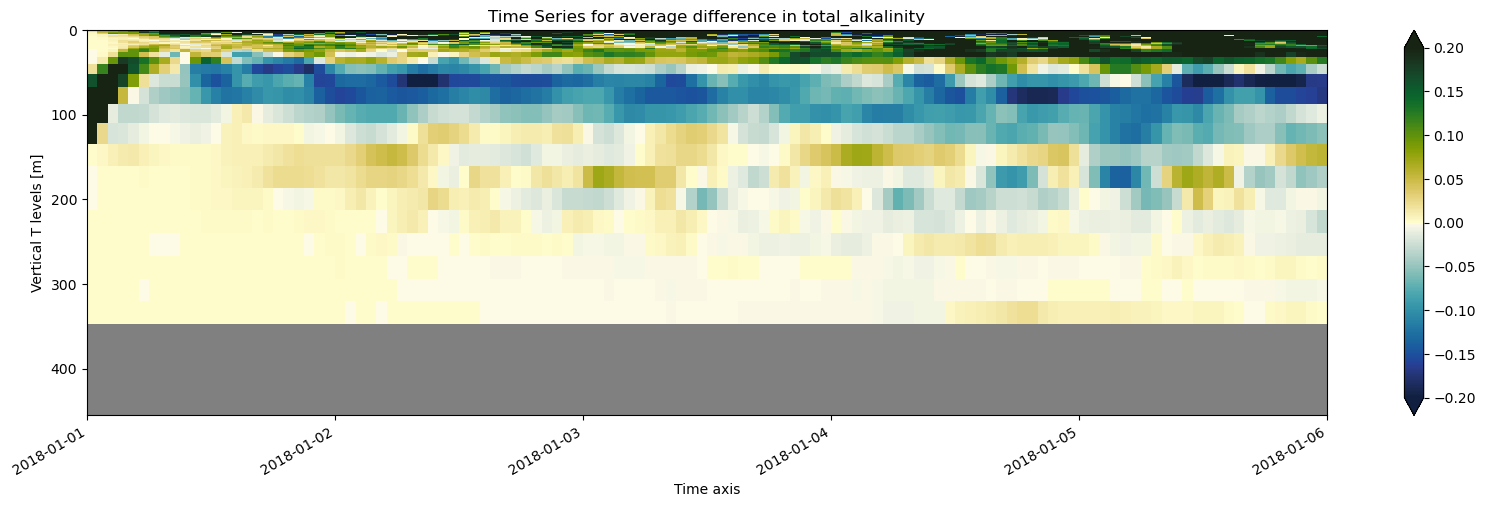

In [12]:
plotAvgDiffTime(combined_data_total_alkalinity_slice, data5_slice, 'total_alkalinity', -0.2, 0.2, cm_delta)

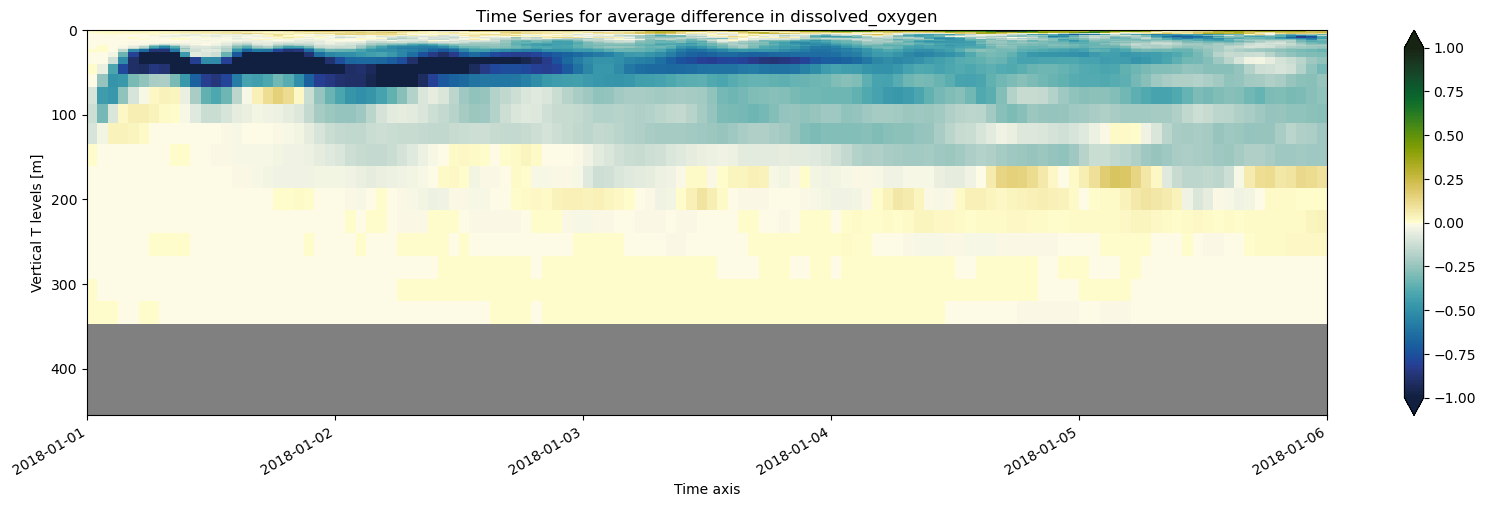

In [13]:
plotAvgDiffTime(combined_data_total_dissolved_oxygen_slice, data5_slice, 'dissolved_oxygen', -1, 1, cm_delta)

In [5]:
data5_p1 = data5.sel(deptht = 121.866516, y = 447, x = 304)
combined_data_dissolved_inorganic_carbon_p1 = combined_data_dissolved_inorganic_carbon.sel(deptht = 121.866516, y = 447, x = 304)
combined_data_total_alkalinity_p1 = combined_data_total_alkalinity.sel(deptht = 121.866516, y = 447, x = 304)

data5_p2 = data5.sel(deptht = 98.06296, y = 446, x = 304)
combined_data_dissolved_inorganic_carbon_p2 = combined_data_dissolved_inorganic_carbon.sel(deptht = 98.06296, y = 446, x = 304)
combined_data_total_alkalinity_p2 = combined_data_total_alkalinity.sel(deptht = 98.06296, y = 446, x = 304)

data5_p3= data5.sel(deptht = 98.06296, y = 447, x = 305)
combined_data_dissolved_inorganic_carbon_p3 = combined_data_dissolved_inorganic_carbon.sel(deptht = 98.06296, y = 447, x = 305)
combined_data_total_alkalinity_p3 = combined_data_total_alkalinity.sel(deptht = 98.06296, y = 447, x = 305)

data5_p4= data5.sel(deptht = 76.58559, y = 446, x = 305)
combined_data_dissolved_inorganic_carbon_p4 = combined_data_dissolved_inorganic_carbon.sel(deptht = 76.58559, y = 446, x = 305)
combined_data_total_alkalinity_p4 = combined_data_total_alkalinity.sel(deptht = 76.58559, y = 446, x = 305)

Text(0, 0.5, 'Dissolved Inorganic Carbon')

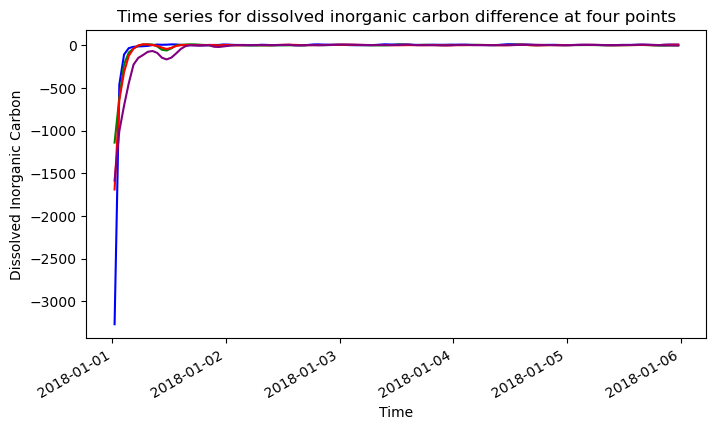

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = combined_data_dissolved_inorganic_carbon_p1.dissolved_inorganic_carbon - data5_p1.dissolved_inorganic_carbon
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = combined_data_dissolved_inorganic_carbon_p2.dissolved_inorganic_carbon - data5_p2.dissolved_inorganic_carbon
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = combined_data_dissolved_inorganic_carbon_p3.dissolved_inorganic_carbon - data5_p3.dissolved_inorganic_carbon
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = combined_data_dissolved_inorganic_carbon_p4.dissolved_inorganic_carbon - data5_p4.dissolved_inorganic_carbon
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for dissolved inorganic carbon difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Dissolved Inorganic Carbon')

Text(0, 0.5, 'Total Alkalinity')

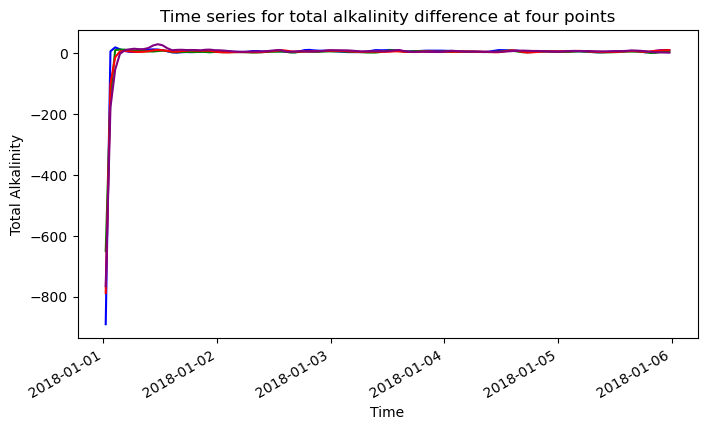

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = combined_data_total_alkalinity_p1.total_alkalinity - data5_p1.total_alkalinity
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = combined_data_total_alkalinity_p2.total_alkalinity - data5_p2.total_alkalinity
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = combined_data_total_alkalinity_p3.total_alkalinity - data5_p3.total_alkalinity
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = combined_data_total_alkalinity_p4.total_alkalinity - data5_p4.total_alkalinity
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for total alkalinity difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Total Alkalinity')

In [6]:
def plotSumDiffTimeLine(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    max_depth = sum_diff.argmax(dim = 'deptht')
    min_depth = sum_diff.argmin(dim='deptht') 
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][max_depth], 'r-')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][min_depth], 'b-')
    axs.set_ylim(150, 0)

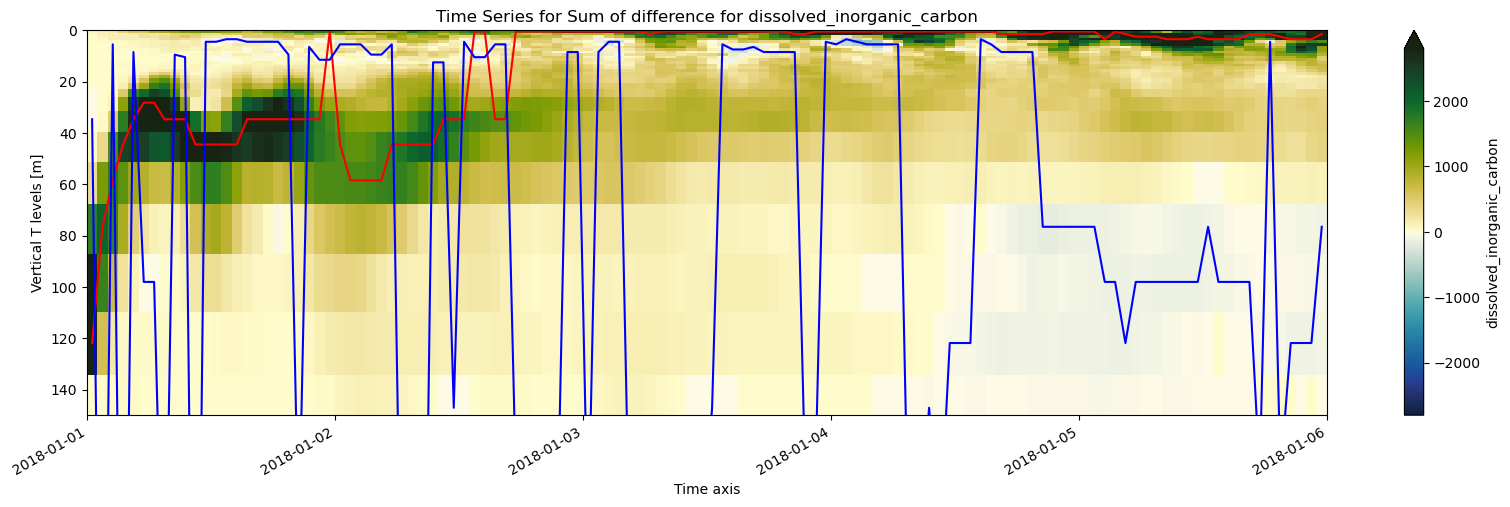

In [7]:
plotSumDiffTimeLine(combined_data_dissolved_inorganic_carbon_slice, data5_slice, 'dissolved_inorganic_carbon', -2800, 2800, cm_delta)

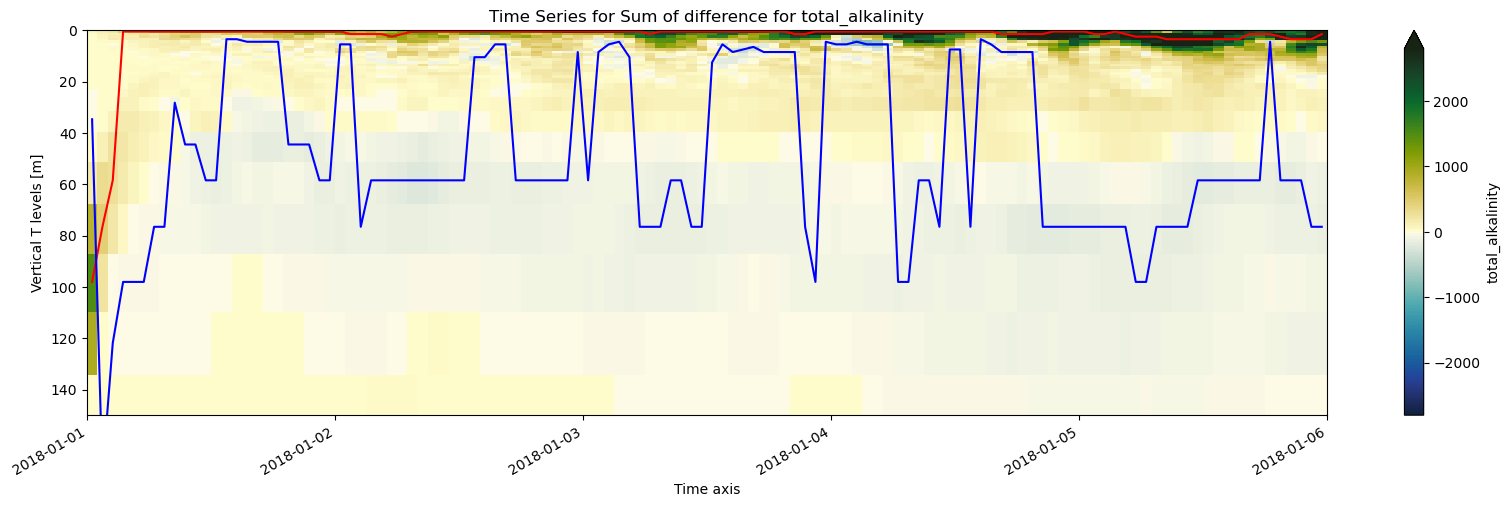

In [9]:
plotSumDiffTimeLine(combined_data_total_alkalinity_slice, data5_slice, 'total_alkalinity', -2800, 2800, cm_delta)

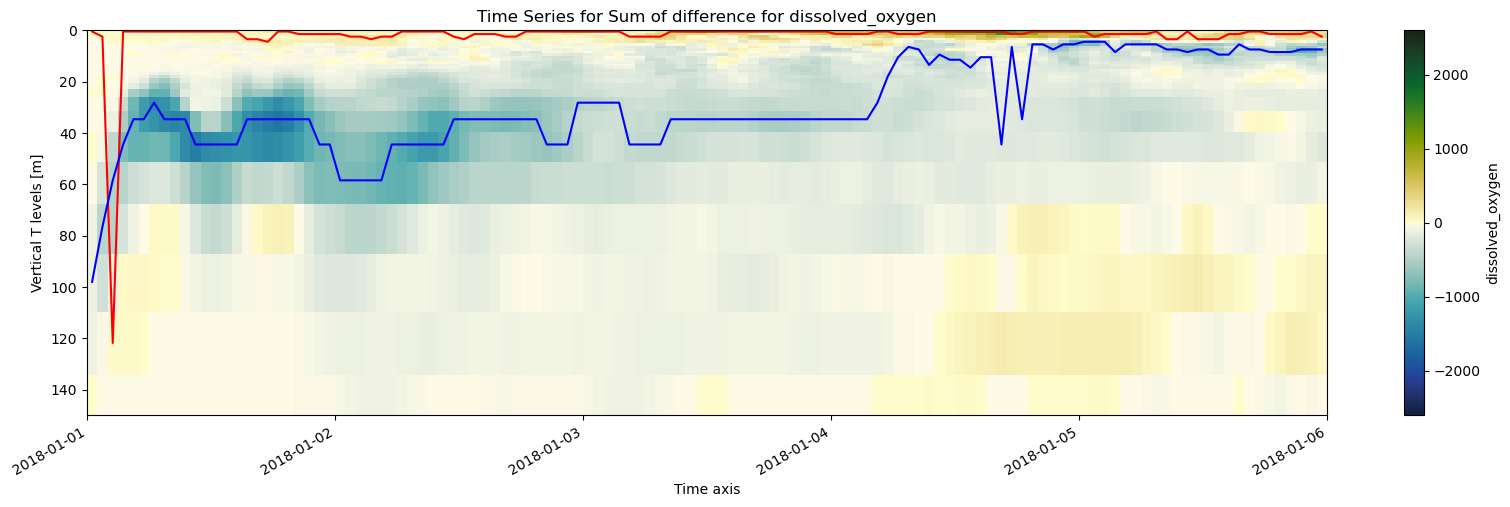

In [8]:
plotSumDiffTimeLine(combined_data_total_dissolved_oxygen_slice, data5_slice, 'dissolved_oxygen', -2600, 2600, cm_delta)